# Capstone - Step5: 



## Capture Windows with random move
<hr style="border:2px solid #007700;">

In [1]:
import pystac_client
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import rasterio
from rasterio.crs import CRS
from rasterio.warp import transform
from rasterio.windows import from_bounds
from rasterio.mask import mask
import numpy as np
from geopy.distance import geodesic
from matplotlib import pyplot as plt
from rasterio.windows import Window, transform as window_transform
import os
seed_value = 23
np.random.seed(seed_value)

In [2]:
# import specific set of tools
from Data_tools import captureWindow

In [8]:
# Define the global variables for the captures
service = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/') # using Brazil Data Cube as data source
center_point = (-15.885858,-47.725772) # Taboquinha Solar farm coordinates
place_name = "Taboquinha"
output_path = ".\\data\\"
nb_images = 20 # number of captures
offset_distance_km = 1.5 # Define the distance to extend from the center_point for the main bounding box
date_interval = '2024-07-01/2024-08-31' # date interval for cloud treatment

In [10]:
captureWindow(service,
              center_point, 
              place_name, 
              output_path, 
              nb_images, 
              offset_distance_km, 
              date_interval)

Main Bounding box limits:
South: -15.899413328902297 	West: -47.73977826421185
North: -15.872302654133014 	East: -47.71176573578815
--------------------------------------------------------------------------------
Number of images in the collection: 5
image file: .\data\Taboquinha_1.tif created
--------------------------------------------------------------------------------
Number of images in the collection: 5
image file: .\data\Taboquinha_2.tif created
--------------------------------------------------------------------------------
Number of images in the collection: 5
image file: .\data\Taboquinha_3.tif created
--------------------------------------------------------------------------------
Number of images in the collection: 5
image file: .\data\Taboquinha_4.tif created
--------------------------------------------------------------------------------
Number of images in the collection: 5
image file: .\data\Taboquinha_5.tif created
-----------------------------------------------------

## Show some captured images with their corresponding automatic and manual annotation masks.
<hr style="border:2px solid #007700;">

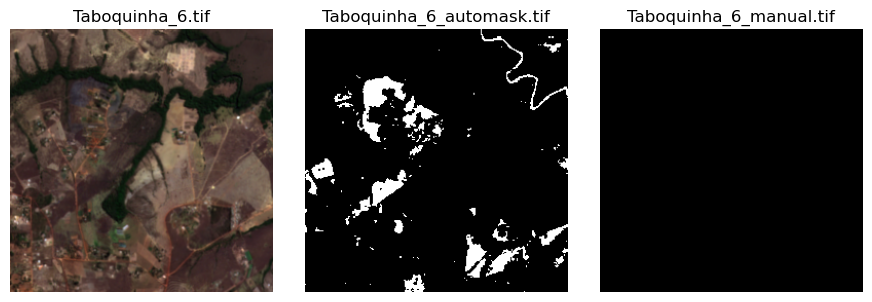

In [16]:
# Define the subfolder and filenames
subfolder = 'data'
filenames = ['Taboquinha_6.tif', 'Taboquinha_6_automask.tif', 'Taboquinha_6_manual.tif'] 

# List to hold processed images
images = []

# Function to normalize bands
def normalize(array):
    array_min, array_max = array.min(), array.max()
    if array_max - array_min == 0:  # in case we deal with an all black image
        # All values are the same
        return np.zeros_like(array)
    else:
        return (array - array_min) / (array_max - array_min)

# Process each image
for filename in filenames:
    filepath = os.path.join(subfolder, filename)
    with rasterio.open(filepath) as dataset:
        band_count = dataset.count
        if band_count >= 3:
            # Read the first three bands (assuming R, G, B)
            r = dataset.read(1)
            g = dataset.read(2)
            b = dataset.read(3)
            r_norm = normalize(r)
            g_norm = normalize(g)
            b_norm = normalize(b)
            rgb = np.dstack((r_norm, g_norm, b_norm))
        
        else:
            # Read the first band and display as grayscale
            band = dataset.read(1)
            rgb = normalize(band)
        images.append(rgb)

# Plot images side by side
num_images = len(images)
fig, axes = plt.subplots(1, num_images, figsize=(3 * num_images, 3))

for ax, img, fname in zip(axes, images, filenames):
    if img.ndim == 3:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap='gray')
    ax.set_title(fname)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Show the 'Capture Windows Random Move' effect.
<hr style="border:2px solid #007700;">

In [74]:
def print_CaptureWindowEffect():
    fig, ax = plt.subplots(3, 3, figsize=(8, 8))

    files = ['.\\data\\Taboquinha_1_manual.tif', '.\\data\\Taboquinha_2_manual.tif', '.\\data\\Taboquinha_3_manual.tif', '.\\data\\Taboquinha_4_manual.tif',
             '.\\data\\Taboquinha_5_manual.tif', '.\\data\\Taboquinha_6_manual.tif', '.\\data\\Taboquinha_7_manual.tif', '.\\data\\Taboquinha_8_manual.tif',
             '.\\data\\Taboquinha_9_manual.tif']

    masks = []
    for file in files:
        try:
            # Open the GeoTIFF file
            with rasterio.open(file) as dataset:
                # Read the mask
                manualMask = dataset.read(1)
                masks.append(manualMask)
        except Exeption as e:
            print(f"Error reading {file}: {e}")
            mask.append(None)
            
    ax = ax.flatten()
           
    for i in range(len(files)):
        if masks[i] is not None:
            # Display the image
            im = ax[i].imshow(masks[i], cmap='gray')
            # Set the title as the file name
            ax[i].set_title(files[i][7:26]) 
            # Remove axis ticks
            ax[i].axis('off')
        else:
            # If the mask is None, indicate that the image couldn't be loaded
            ax[i].text(0.5, 0.5, 'Image not available', horizontalalignment='center',
                       verticalalignment='center', fontsize=12, color='red')
            ax[i].set_title(f"Image {i+1}")
            ax[i].axis('off')  
            
    plt.tight_layout()
    plt.show()

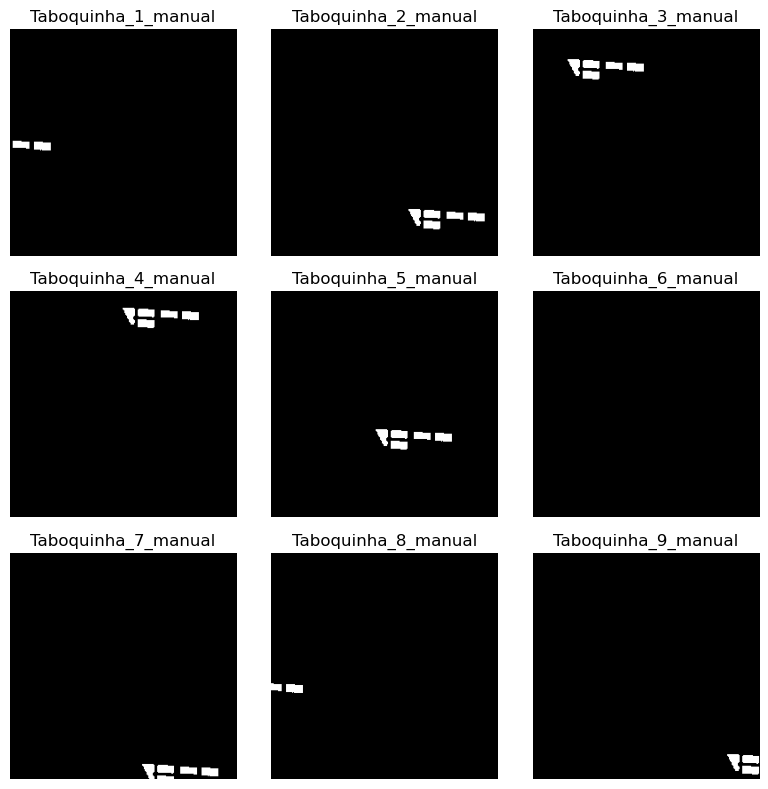

In [76]:
print_CaptureWindowEffect()